# OpenCv Guide 
(From pyimagesearch)
check it out [here](https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/)

In [47]:
#import the required packages
import imutils
import cv2
import matplotlib.pyplot as plt # for showing images in notebook
%matplotlib inline

## Loading and displaying an Image

Images are read as multi-dimensional NumPy arrays 
The shape of a coloured image will be:
 ***img.shape => rows(height) x columns(width) x channels(depth)***

In [48]:
image = cv2.imread("jp.png") # read the image stored on disk
(h, w, d) = image.shape # image shape of image and store it 

print("width={}, height={}, depth={}".format(w,h,d))

width=600, height=322, depth=3


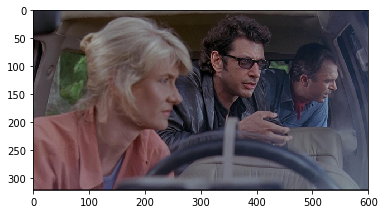

In [49]:
# cv2 reads images in BGR format, 
# "image[...,::-1]" this changes it into RGB so that colors are not distorted
plt.imshow(image[...,::-1])
plt.show()

## Accessing individual pixels 
<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/06/opencv_tutorial_gradient_rgb.jpg">

**What is a pixel?**

All images consist of pixels which are the raw building blocks of images. Images are made of pixels in a grid. A $640 x 480$ image has $640$ columns (the width) and $480$ rows (the height). There are $640 * 480 = 307200$  pixels in an image with those dimensions.

Each pixel in a grayscale image has a value representing the shade of gray. In OpenCV, there are $256$ shades of gray — from $0$ to $255$. So a grayscale image would have a grayscale value associated with each pixel.

Pixels in a color image have additional information. There are several color spaces that you’ll soon become familiar with as you learn about image processing. For simplicity let’s only consider the RGB color space.

In OpenCV color images in the RGB (Red, Green, Blue) color space have a 3-tuple associated with each pixel: (B, G, R) .

Notice the ordering is BGR rather than RGB. This is because when OpenCV was first being developed many years ago the standard was BGR ordering. Over the years, the standard has now become RGB but OpenCV still maintains this “legacy” BGR ordering to ensure no existing code breaks.

Each value in the BGR 3-tuple has a range of $[0, 255]$ . How many color possibilities are there for each pixel in an RGB image in OpenCV? That’s easy: $256 * 256 * 256 = 16777216 $.

Now that we know exactly what a pixel is, let’s see how to retrieve the value of an individual pixel in the image:

In [50]:
# accssing the RGB pixel loacated at x=50, y=100,
# Recall, that OpenCV use BGR format
(B,G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


As shown previously, our image dimensions are $width=600, height=322, depth=3$ . We can access individual pixel values in the array by specifying the coordinates so long as they are within the max width and height.

## Array slicing and cropping

Extracting "regions of interest" (ROIs) is an important skill for image processing.

For now, let’s just manually extract an ROI. This can be accomplished with array slicing.

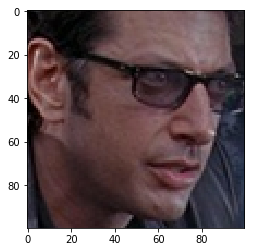

In [51]:
# extract a 100x100 pixel sqaure ROI from the input image
# starting ar x=320, y=60 and ending at x=420, y=160
roi = image[60:160, 320:420] # using array slicing here
plt.imshow(roi[...,::-1])
plt.show()

## Resizing images
Resizing images is important for a number of reasons. First, you might want to resize a large image to fit on your screen. Image processing is also faster on smaller images because there are fewer pixels to process. 

_In the case of deep learning, we often resize images, ignoring aspect ratio, so that the volume fits into a network which requires that an image be square and of a certain dimension._

Let’s resize our original image to 200 x 200 pixels:



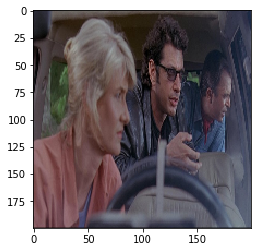

In [52]:
# resize the image to 200x200 pixels
resized = cv2.resize(image, (200,200))
plt.imshow(resized[...,::-1])
plt.show()

The image is distoreted because we didn;t take into account the aspet ratio.

Calculate the aspect ratio and use that to resize the image, so that it does't look squished

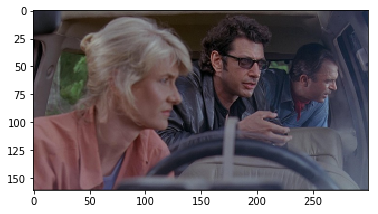

In [53]:
# Fixed resizing distorted the the aspect ratio,
# resize width to 300px but resize height
# based on asptect raio of the image

r = 300.0/ w # calculate ratio of new width to old 
dim  = (300, int(h*r)) # resized image dimension  
resized = cv2.resize(image, dim)
plt.imshow(resized[..., ::-1])
plt.show()

Manually computing the aspect ratio can be a pain so use the imutils library instead.

We only need to provide either the width or height target, for a resize that maintains aspect ratio

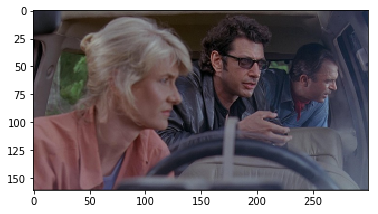

In [54]:
# using imutils lib to do the resizing for us
resized = imutils.resize(image=image, width=300) # only traget width set
plt.imshow(resized[..., ::-1])
plt.show()

## Rotate an Image

Rotating an image about the center point requires that we first calculate the center (x, y)-coordinates of the image.

___Note: We use //  to perform integer math (i.e., no floating point values).___

From there we calculate a rotation matrix, M. The -45  means that we’ll rotate the image 45 degrees clockwise. _Recall from your middle/high school geometry class about the unit circle and you’ll be able to remind yourself that positive angles are counterclockwise and negative angles are clockwise._

From there we warp the image using the matrix (effectively rotating it).

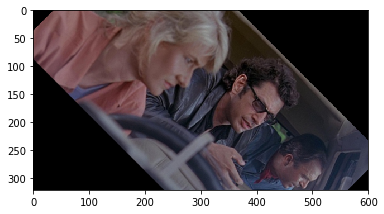

In [55]:
# To ratate first find center of the image
# then, calculate the rotation matrix and finally warp the 
# image according to the rotation matrix

center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center = center, angle = -45, scale=1.0) # scale=1.0 -> don't scale
rotated = cv2.warpAffine(src=image, M=M, dsize=(w,h)) #src= input image, M=tranformation matrix, dsize= output size
plt.imshow(rotated[...,::-1])
plt.show()

Using imutils convenience function for rotation

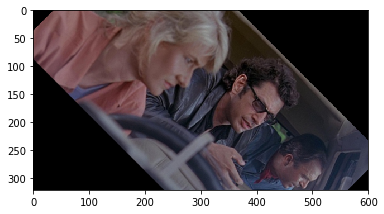

In [56]:
rotated = imutils.rotate(image, -45)
plt.imshow(rotated[...,::-1])
plt.show()

**Why in the world is the image clipped?**

The thing is, OpenCV doesn’t care if our image is clipped and out of view after the rotation.So, here’s imutils  version which will keep the entire image in view.

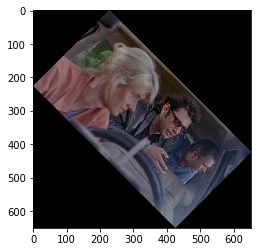

In [57]:
rotated = imutils.rotate_bound(image, angle=45) # here postive angle is clockwise
plt.imshow(rotated[...,::-1])
plt.show()

## Smoothing an image

In many image processing pipelines, image blurring is common to reduce high-frequency noise, making it easier for algorithms to detect and understand the actual _contents_ of the image rather than noise that will "confuse" our algorithms.

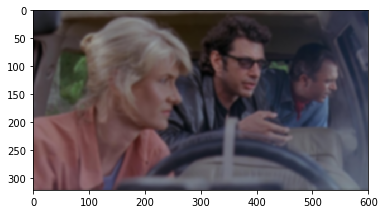

In [58]:
# Gaussian blur with 11x11 kernel to the image to smooth it
blurred = cv2.GaussianBlur(image, (11,11), 0)
plt.imshow(blurred[...,::-1])
plt.show()

___Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images.___

## Drawing on an image
___Before we move on with drawing on an image with OpenCV, take note that drawing operations on images are performed in-place. Therefore at the beginning of each code block, we make a copy of the original image storing the copy as output . We then proceed to draw on the image called output in-place so we do not destroy our original image.___

A rectangle is drawn as follows:

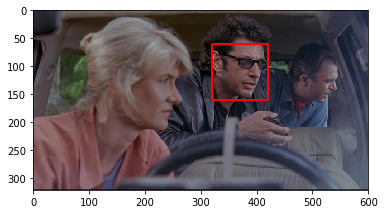

In [59]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(img=output, pt1=(320, 60), pt2=(420, 160), color=(0,0,255),
              thickness=2)
plt.imshow(output[..., ::-1])
plt.show()

The following parameters to the cv2.rectangle function are supplied:

- _img_ : The destination image to draw upon. We’re drawing on output .
- _pt1_ : Our starting pixel coordinate which is the top-left. In our case, the top-left is (320, 60) .
- _pt2_ : The ending pixel — bottom-right. The bottom-right pixel is located at  (420, 160) .
- _color_ : BGR tuple. To represent red (0 , 0, 255) .
- _thickness_ : Line thickness (a negative value will make a solid rectangle). Thickness set to 2 .

___Since we are using OpenCV’s functions rather than NumPy operations we can supply our coordinates in (x, y) order rather than (y, x) since we are not manipulating or accessing the NumPy array directly — OpenCV is taking care of that for us.___


A circle is drawn as follows:

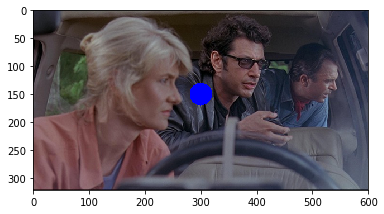

In [60]:
# draw a blue 20px(filled in) circle on the image centered at
# x=300, y=150

output = image.copy()
cv2.circle(img=output, center=(300, 150), radius=20, color=(255,0,0),
           thickness=-1)
plt.imshow(output[...,::-1])
plt.show()

To draw a circle, you need to supply following parameters to cv2.circle :

- _img_ : The output image.
- _center_ : Our circle’s center coordinate.Set to (300, 150)
- _radius_ : The circle radius in pixels. Set to 20  pixels.
- _color_ : Circle color. Set to blue as is denoted by 255 in the B and 0s in the G + R components of the BGR tuple, (255, 0, 0) .
- _thickness_ : The line thickness. Set to a negative value ( -1 ), the circle is solid/filled in.


A line is drawn similar to a rectangle:

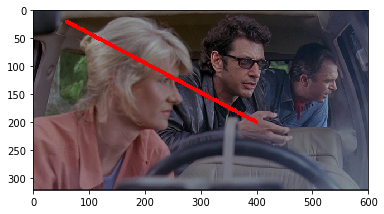

In [61]:
output = image.copy()
cv2.line(img = output, pt1 = (60,20), pt2=(400,200), color= (0, 0, 255),
        thickness=5)
plt.imshow(output[...,::-1])
plt.show()

OpenCv's putText function is used as follows:

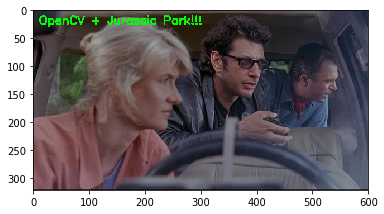

In [62]:
# draw green text on the image
output = image.copy()
cv2.putText(img = output, text = "OpenCV + Jurassic Park!!!", 
           org = (10,25), fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale = 0.7, color = (0, 255, 0), thickness = 2)
plt.imshow(output[...,::-1])
plt.show()

The putText  function of OpenCV is responsible for drawing text on an image. Here are its the required parameters:

- _img_ : The output image.
- _text_ : The string of text we’d like to write/draw on the image.
- _org_ : The starting point for the text.
- _fontFace_ : I often use the cv2.FONT_HERSHEY_SIMPLEX 
- _fontScale_ : Font size multiplier.
- _color_: Text color.
- _thickness_ : The thickness of the stroke in pixels.

## Converting image to grayscale


shape of grayscale image: (250, 482)


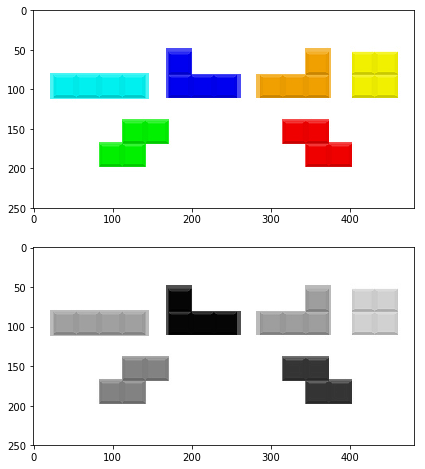

In [63]:
# load the image 
image = cv2.imread("tetris_blocks.png")

# display both color and gray image side-by-side
fig, ax = plt.subplots(2,1, figsize=(11,8))
ax[0].imshow(image[...,::-1]) # colored image

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("shape of grayscale image: {}".format(gray.shape))

# By default, matplotlib use a colormap which maps intensities 
# to colors. To avoid this, pass cmap='gray' as n argument
ax[1].imshow(gray, cmap='gray') # gray image
plt.show()

## Edge detection

Edge detection is useful for finding boundaries of objects in an image — it is effective for segmentation purposes.

Using the popular Canny algorithm (developed by John F. Canny in 1986), we can find the edges in the image.

We provide three parameters to the cv2.Canny  function:

- _img_ : The gray  image.
- _minVal_ : A minimum threshold. Set to 30 below.
- _maxVal_ : The maximum threshold which is set 150  below.
- _aperture_size_ : The Sobel kernel size. By default this value is 3  and hence is not shown below


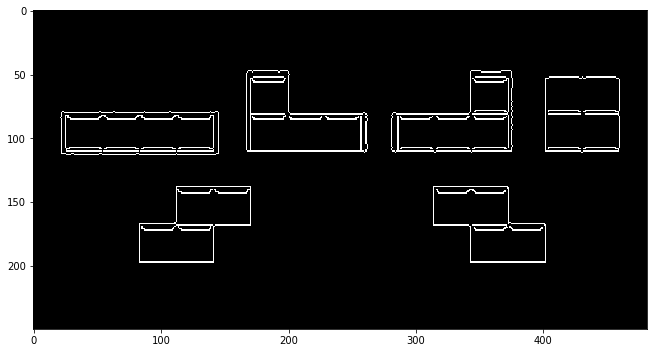

In [64]:
# by applying edge detection we can find outlines of objects in images
edged = cv2.Canny(gray, 30, 150)

fig = plt.figure(figsize=(11,8)) # set figure size
plt.imshow(edged, cmap='gray')
plt.show()

## Thresholding

Thresholding images is an important intermediary strp for image processing pipelines. Threaholding can help to remove lighter or darker regions and contours of th images.

Finding threshold values is a process of exprementation and trial and error.


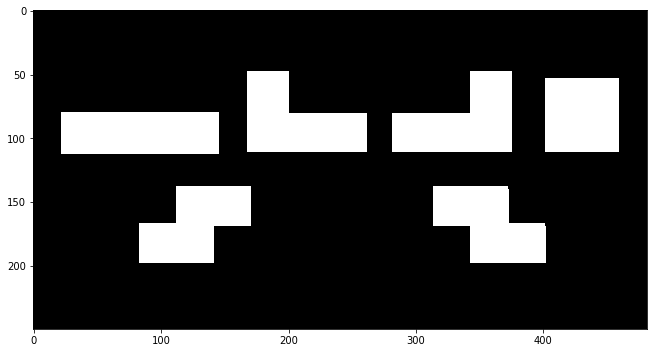

In [65]:
# Threshold the image by setting all pixel values less than 225
# to 255(white; foreground) and all pixel values >= 225 to 255 
# (white; foreground)

# If Otsu thresholding is not used, 
# retVal is same as the threshold value you used, otherwise
# the Otsu algorithm finds the optimal threshold value 
# and returns you as the second output, retVal
retVal,thresh = cv2.threshold(src=gray, thresh=225, maxval=255, 
                      type= cv2.THRESH_BINARY_INV)

fig = plt.figure(figsize=(11,8)) # set figure size
plt.imshow(thresh, cmap='gray')
plt.show()

above we did the following:
- Grabbing all pixels in the gray  image greater than 225 and setting them to 0 (black) which corresponds to the background of the image
- Setting pixel vales less than 225 to 255 (white) which corresponds to the foreground of the image (i.e., the Tetris blocks themselves).

Segmenting foreground from background with a binary image is critical to finding contours.



## Detecting and drawing contours
Let’s find and draw their outlines:


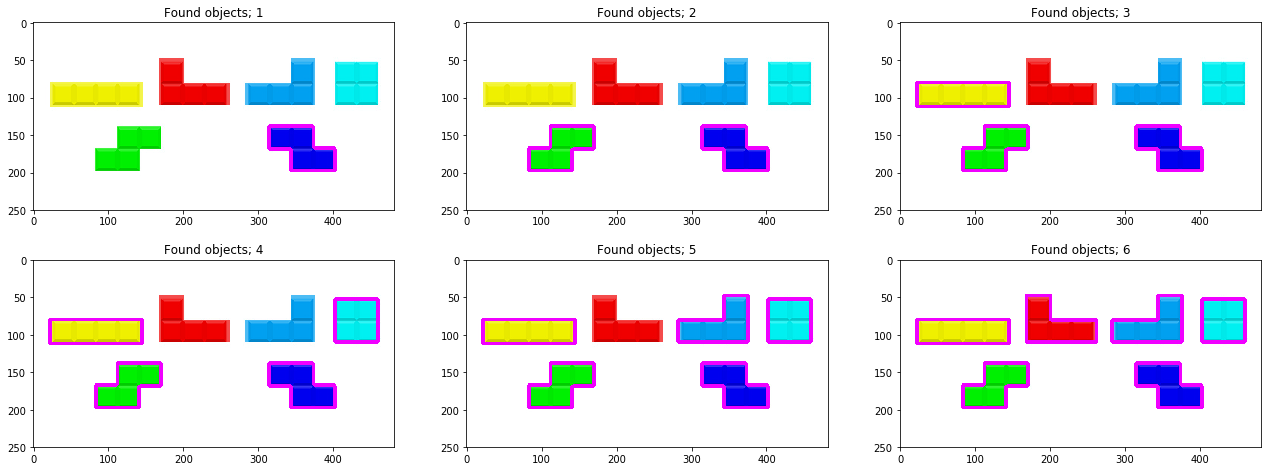

In [66]:
# find the contours (i.e. outlines) of the foreground objects in the 
# thrsholded image

contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours)
output = image.copy()


fig = plt.figure(figsize=(22,8))
# loop over contours
for i in range(len(contours)):
    plt.subplot(2,3,i+1)
    cv2.drawContours(output, [contours[i]], -1, (240,0,259), 3)
    plt.title("Found objects; {}".format(i+1))
    plt.imshow(output)
plt.show()



Ovelay some text that denotes total number of objects

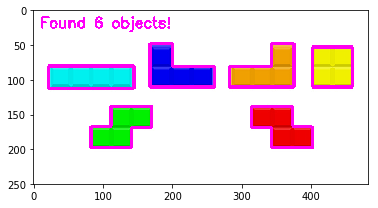

In [67]:
# draw the total number of contours found in purple
text = "Found {} objects!".format(len(contours))
cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
           (249, 0, 259), 2)
plt.imshow(output[...,::-1])
plt.show()

## Erosions and Dilations

Erosions and dilations are typlically used to reduce noise in the binary images (a side-effect of thresholding)

To reduce size of foreground objects we can erode away pixels given a number of iteerations:

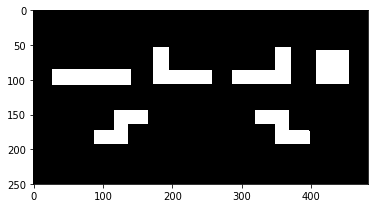

In [68]:
# Appling ersion to reduce the size of forground pixels and remove
# noisy pixels

mask = thresh.copy() # use copy of the thresholded image
mask = cv2.erode(src= mask, kernel=None, iterations=5)
plt.imshow(mask, cmap='gray')
plt.show()

Due to erosion the image is much cleaner, but the objects now are a bilt smaller than before, to undo this we can now dilate the image to make remaining objects a bit bigger

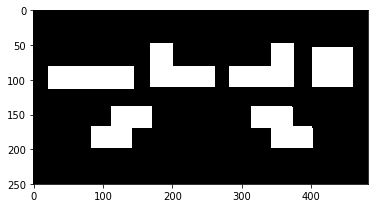

In [69]:
# simailar to erosion, dilations can increase the size of the 
# foreground objects
mask = cv2.dilate(mask, None, iterations=5)
plt.imshow(mask, cmap='gray')
plt.show()

Back to original size

## Masking and bitwise operations

Masks allow us to “mask out” regions of an image we are uninterested in. We call them “masks” because they will hide regions of images we do not care about.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/05/opencv_tutorial_bitwise_masking.jpg">

_When using the thresholded image as the mask in comparison to our original image, the colored regions reappear and the rest of the image is “masked out”. This is, of course, a simple example, but as you can imagine, masks are very powerful._

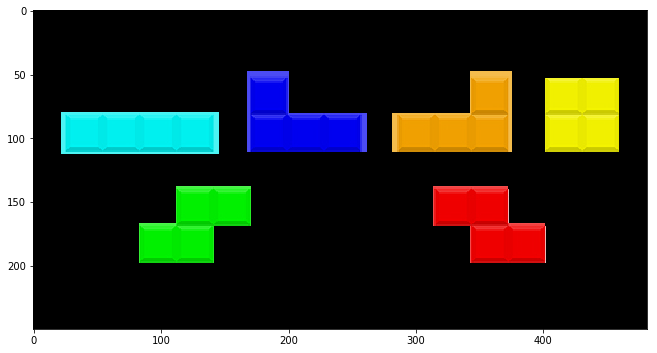

In [70]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask= mask)
fig = plt.figure(figsize=(11,8))
plt.imshow(output[...,::-1])
plt.show()

The background is black now and our foreground consists of colored pixels — any pixels masked by our mask  image.

The _mask_  is generated by copying the binary thresh  image.

From there we bitwise AND the pixels from both images together using
__cv2.bitwise_and__

_The operation of "And" will be performed only if mask[i] doesn't equal zero, else the the result of and operation will be zero._